

Before we get started, a couple of reminders to keep in mind when using iPython notebooks:

- Remember that you can see from the left side of a code cell when it was last run if there is a number within the brackets.
- When you start a new notebook session, make sure you run all of the cells up to the point where you last left off. Even if the output is still visible from when you ran the cells in your previous session, the kernel starts in a fresh state so you'll need to reload the data, etc. on a new session.
- The previous point is useful to keep in mind if your answers do not match what is expected in the lesson's quizzes. Try reloading the data and run all of the processing steps one by one in order to make sure that you are working with the same variables and data that are at each quiz stage.

In [1]:
import unicodecsv
from pprint import pprint

## Load Data from CSVs

In [2]:
## Longer version of code (replaced with shorter, equivalent version below)

# enrollments = []
# f = open('enrollments.csv', 'rb')
# reader = unicodecsv.DictReader(f)
# for row in reader:
#     enrollments.append(row)
# f.close()

with open('data/enrollments.csv', 'rb') as f:
    reader = unicodecsv.DictReader(f)
    enrollments = list(reader)

I'm doing the same thing here for these files, so I am going to make a quick function to load the csv.  It seems silly that loading a csv is something I would have to write a function for, but oh well. 

In [3]:
#####################################
#                 1                 #
#####################################

## Read in the data from daily_engagement.csv and project_submissions.csv 
## and store the results in the below variables.
## Then look at the first row of each table.

def read_csv(file):
    with open(file, 'rb') as f:
        reader = unicodecsv.DictReader(f)
        return list(reader)

daily_engagement = read_csv('data/daily_engagement.csv')
project_submissions = read_csv('data/project_submissions.csv')

In [4]:
pprint(enrollments[0])
pprint(daily_engagement[0])
pprint(project_submissions[0])

{u'account_key': u'448',
 u'cancel_date': u'2015-01-14',
 u'days_to_cancel': u'65',
 u'is_canceled': u'True',
 u'is_udacity': u'True',
 u'join_date': u'2014-11-10',
 u'status': u'canceled'}
{u'acct': u'0',
 u'lessons_completed': u'0.0',
 u'num_courses_visited': u'1.0',
 u'projects_completed': u'0.0',
 u'total_minutes_visited': u'11.6793745',
 u'utc_date': u'2015-01-09'}
{u'account_key': u'256',
 u'assigned_rating': u'UNGRADED',
 u'completion_date': u'2015-01-16',
 u'creation_date': u'2015-01-14',
 u'lesson_key': u'3176718735',
 u'processing_state': u'EVALUATED'}


## Fixing Data Types

It seems like a slow start to have to write loops to pull in data from a csv and then write your own date conversion functions. It is what programmers have had to do for decades though so I guess its a fitting start. 

I still think if this is about data analysis, we should just use the libraries that already handle this part in an efficient way to start though. I really wish there was a library like readr from Hadley in R that would make it easy to handle the date types, or set them automatically. This is a well defined problem. Maybe there is a package in python that can do this better. 

In [5]:
from datetime import datetime as dt

# Takes a date as a string, and returns a Python datetime object. 
# If there is no date given, returns None
def parse_date(date):
    if date == '':
        return None
    else:
        return dt.strptime(date, '%Y-%m-%d')
    
# Takes a string which is either an empty string or represents an integer,
# and returns an int or None.
def parse_maybe_int(i):
    if i == '':
        return None
    else:
        return int(i)

# Clean up the data types in the enrollments table
for enrollment in enrollments:
    enrollment['cancel_date'] = parse_date(enrollment['cancel_date'])
    enrollment['days_to_cancel'] = parse_maybe_int(enrollment['days_to_cancel'])
    enrollment['is_canceled'] = enrollment['is_canceled'] == 'True'
    enrollment['is_udacity'] = enrollment['is_udacity'] == 'True'
    enrollment['join_date'] = parse_date(enrollment['join_date'])
    
enrollments[0]

{u'account_key': u'448',
 u'cancel_date': datetime.datetime(2015, 1, 14, 0, 0),
 u'days_to_cancel': 65,
 u'is_canceled': True,
 u'is_udacity': True,
 u'join_date': datetime.datetime(2014, 11, 10, 0, 0),
 u'status': u'canceled'}

In [6]:
# Clean up the data types in the engagement table
for engagement_record in daily_engagement:
    engagement_record['lessons_completed'] = int(float(engagement_record['lessons_completed']))
    engagement_record['num_courses_visited'] = int(float(engagement_record['num_courses_visited']))
    engagement_record['projects_completed'] = int(float(engagement_record['projects_completed']))
    engagement_record['total_minutes_visited'] = float(engagement_record['total_minutes_visited'])
    engagement_record['utc_date'] = parse_date(engagement_record['utc_date'])
    
daily_engagement[0]

{u'acct': u'0',
 u'lessons_completed': 0,
 u'num_courses_visited': 1,
 u'projects_completed': 0,
 u'total_minutes_visited': 11.6793745,
 u'utc_date': datetime.datetime(2015, 1, 9, 0, 0)}

In [7]:
# Clean up the data types in the submissions table
for submission in project_submissions:
    submission['completion_date'] = parse_date(submission['completion_date'])
    submission['creation_date'] = parse_date(submission['creation_date'])

project_submissions[0]

{u'account_key': u'256',
 u'assigned_rating': u'UNGRADED',
 u'completion_date': datetime.datetime(2015, 1, 16, 0, 0),
 u'creation_date': datetime.datetime(2015, 1, 14, 0, 0),
 u'lesson_key': u'3176718735',
 u'processing_state': u'EVALUATED'}

Note when running the above cells that we are actively changing the contents of our data variables. If you try to run these cells multiple times in the same session, an error will occur.

## Investigating the Data

In [8]:
#####################################
#                 2                 #
#####################################

## Find the total number of rows and the number of unique students (account keys)
## in each table.

### Enrollments

In [9]:
len(enrollments)

1640

One way to get a unique list is to create a set (sets hold non-duplicate values) and then loop through the enrollments list adding the account key to the set in each iteration. 

In [10]:
unique_students_enrolled = set()
for enrollment in enrollments:
    unique_students_enrolled.add(enrollment['account_key'])
len(unique_students_enrolled)

1302

Another way to get a unique lis is to use a set comprehension. This does the same thing, just with a compact syntax.

In [11]:
unique_students_enrolled = {i['account_key'] for i in enrollments}
len(unique_students_enrolled)

1302

### Daily Engagment

In [12]:
len(daily_engagement)

136240

In [13]:
unique_students_engagment = {i['acct'] for i in daily_engagement}
len(unique_students_engagment)

1237

### Project Submissions

In [14]:
len(project_submissions)

3642

In [15]:
unique_students_project = {i['account_key'] for i in project_submissions}
len(unique_students_project)

743

## Problems in the Data

In [16]:
#####################################
#                 3                 #
#####################################

## Rename the "acct" column in the daily_engagement table to "account_key".

In [17]:
daily_engagement[0]

{u'acct': u'0',
 u'lessons_completed': 0,
 u'num_courses_visited': 1,
 u'projects_completed': 0,
 u'total_minutes_visited': 11.6793745,
 u'utc_date': datetime.datetime(2015, 1, 9, 0, 0)}

In [18]:
for i in daily_engagement:
    i['account_key'] = i.pop('acct')

In [19]:
daily_engagement[0]

{'account_key': u'0',
 u'lessons_completed': 0,
 u'num_courses_visited': 1,
 u'projects_completed': 0,
 u'total_minutes_visited': 11.6793745,
 u'utc_date': datetime.datetime(2015, 1, 9, 0, 0)}

In [20]:
daily_engagement[11000]

{'account_key': u'66',
 u'lessons_completed': 0,
 u'num_courses_visited': 0,
 u'projects_completed': 0,
 u'total_minutes_visited': 0.0,
 u'utc_date': datetime.datetime(2015, 6, 13, 0, 0)}

### Now its a bit easier to explore the data

Now that I have updated the daily_engagment account_key to be the same as the other lists, I could easily make a function with the set comprehension to create a set of the unique account keys. This step should be moved up and then I can explore the data more easily.

In [21]:
def get_unique_students(data):
    unique_students = {i['account_key'] for i in data}
    return unique_students

unique_students_enrolled = get_unique_students(enrollments)
len(unique_students_enrolled)

1302

I can also do this on the daily_engagment list now

In [22]:
unique_students_engagement= get_unique_students(daily_engagement)
len(unique_students_engagement)

1237

## Missing Engagement Records

In [23]:
#####################################
#                 4                 #
#####################################

## Find any one student enrollments where the student is missing from the daily engagement table.
## Output that enrollment.

In [24]:
enrollments[0]

{u'account_key': u'448',
 u'cancel_date': datetime.datetime(2015, 1, 14, 0, 0),
 u'days_to_cancel': 65,
 u'is_canceled': True,
 u'is_udacity': True,
 u'join_date': datetime.datetime(2014, 11, 10, 0, 0),
 u'status': u'canceled'}

In [25]:
for enrollment in enrollments:
    students = enrollment['account_key']
    if students not in unique_students_engagement:
        pprint(enrollment)
        break

{u'account_key': u'1219',
 u'cancel_date': datetime.datetime(2014, 11, 12, 0, 0),
 u'days_to_cancel': 0,
 u'is_canceled': True,
 u'is_udacity': False,
 u'join_date': datetime.datetime(2014, 11, 12, 0, 0),
 u'status': u'canceled'}


## Checking for More Problem Records

In [26]:
#####################################
#                 5                 #
#####################################

## Find the number of surprising data points (enrollments missing from
## the engagement table) that remain, if any.

In [27]:
num_problem_students = 0

for enrollment in enrollments:
    student = enrollment['account_key']
    if student not in unique_students_engagement \
        and enrollment['join_date'] != enrollment['cancel_date']:
            num_problem_students +=1
            pprint(enrollment)
            
num_problem_students

{u'account_key': u'1304',
 u'cancel_date': datetime.datetime(2015, 3, 10, 0, 0),
 u'days_to_cancel': 59,
 u'is_canceled': True,
 u'is_udacity': True,
 u'join_date': datetime.datetime(2015, 1, 10, 0, 0),
 u'status': u'canceled'}
{u'account_key': u'1304',
 u'cancel_date': datetime.datetime(2015, 6, 17, 0, 0),
 u'days_to_cancel': 99,
 u'is_canceled': True,
 u'is_udacity': True,
 u'join_date': datetime.datetime(2015, 3, 10, 0, 0),
 u'status': u'canceled'}
{u'account_key': u'1101',
 u'cancel_date': None,
 u'days_to_cancel': None,
 u'is_canceled': False,
 u'is_udacity': True,
 u'join_date': datetime.datetime(2015, 2, 25, 0, 0),
 u'status': u'current'}


3

## Tracking Down the Remaining Problems

In [28]:
# Create a set of the account keys for all Udacity test accounts
udacity_test_accounts = set()
for enrollment in enrollments:
    if enrollment['is_udacity']:
        udacity_test_accounts.add(enrollment['account_key'])
len(udacity_test_accounts)

6

In [29]:
# Given some data with an account_key field, removes any records corresponding to Udacity test accounts
# def remove_udacity_accounts(data):
#     non_udacity_data = []
#     for data_point in data:
#         if data_point['account_key'] not in udacity_test_accounts:
#             non_udacity_data.append(data_point)
#     return non_udacity_data

def remove_udacity_accounts(data):
    non_udacity_data = []
    for data_point in data:
        if data_point['account_key'] not in udacity_test_accounts:
            non_udacity_data.append(data_point)
    return non_udacity_data

Wow, make sure to keep your indents corret. I had the `return` to deep and was only getting back 1 data point from the function. That was confusing at first. Especially because there were no typos to catch, just indent mismatch. I was returning the first case I guess. 

In [30]:
# Remove Udacity test accounts from all three tables
non_udacity_enrollments = remove_udacity_accounts(enrollments)
non_udacity_engagement = remove_udacity_accounts(daily_engagement)
non_udacity_submissions = remove_udacity_accounts(project_submissions)

print len(non_udacity_enrollments)
print len(non_udacity_engagement)
print len(non_udacity_submissions)

1622
135656
3634


## Refining the Question

In [31]:
#####################################
#                 6                 #
#####################################

## Create a dictionary named paid_students containing all students who either
## haven't canceled yet or who remained enrolled for more than 7 days. The keys
## should be account keys, and the values should be the date the student enrolled.

paid_students = {}

for enrollment in non_udacity_enrollments:
    if not enrollment['is_canceled'] or enrollment['days_to_cancel'] > 7:
        account_key = enrollment['account_key']
        enrollment_date = enrollment['join_date']
        
        ## only keep the most recent enrollment date for each student
        if account_key not in paid_students or \
                enrollment_date > paid_students[account_key]:
            paid_students[account_key] = enrollment_date

len(paid_students)

995

## Getting Data from First Week

In [32]:
# Takes a student's join date and the date of a specific engagement record,
# and returns True if that engagement record happened within one week
# of the student joining.
def within_one_week(join_date, engagement_date):
    time_delta = engagement_date - join_date
    return time_delta.days < 7 and time_delta.days >= 0 

We made a list of the paid students, but we still need to filter all our lists based on whether or not the account_key is in the paid students dictionary.

In [33]:
def remove_free_trial_cancels(data):
    new_data = []
    for data_point in data:
        if data_point['account_key'] in paid_students:
            new_data.append(data_point)
    return new_data

In [34]:
paid_enrollments = remove_free_trial_cancels(non_udacity_enrollments)
paid_engagement = remove_free_trial_cancels(non_udacity_engagement)
paid_submissions = remove_free_trial_cancels(non_udacity_submissions)

print len(paid_enrollments)
print len(paid_engagement)
print len(paid_submissions)

1293
134549
3618


In [53]:
for engagement_record in paid_engagement:
    if engagement_record['num_courses_visited'] > 0:
        engagement_record['has_visited'] = 1
    else:
        engagement_record['has_visited'] = 0
    

In [54]:
#####################################
#                 7                 #
#####################################

## Create a list of rows from the engagement table including only rows where
## the student is one of the paid students you just found, and the date is within
## one week of the student's join date.

paid_engagement_in_first_week = []

for engagement_record in paid_engagement:
    account_key = engagement_record['account_key']
    join_date = paid_students[account_key]
    engagement_record_date = engagement_record['utc_date']
    
    if within_one_week(join_date, engagement_record_date):
        paid_engagement_in_first_week.append(engagement_record)

len(paid_engagement_in_first_week)

6919

In [55]:
paid_engagement[0]

{'account_key': u'0',
 'has_visited': 1,
 u'lessons_completed': 0,
 u'num_courses_visited': 1,
 u'projects_completed': 0,
 u'total_minutes_visited': 11.6793745,
 u'utc_date': datetime.datetime(2015, 1, 9, 0, 0)}

## Exploring Student Engagement

First we will create a dictionary of engagement grouped by student. We need to put all the daily engagment records into a list and key it on the account_key. 

In [56]:
from collections import defaultdict

engagement_by_account = defaultdict(list)
for engagement_record in paid_engagement_in_first_week:
    account_key = engagement_record['account_key']
    engagement_by_account[account_key].append(engagement_record)

Then we can loop through and sum the values in the list for each student. 

In [57]:
total_minutes_by_account = {}
for account_key, engagement_for_student in engagement_by_account.items():
    total_minutes = 0
    for engagement_record in engagement_for_student:
        total_minutes += engagement_record['total_minutes_visited']
    total_minutes_by_account[account_key] = total_minutes

And finally, we can put the values into an array and use the numpy package to get statistics on the distribution of values.

In [58]:
import numpy as np

total_minutes = total_minutes_by_account.values()
print 'Mean:', np.mean(total_minutes)
print 'Standard deviation:', np.std(total_minutes)
print 'Minimum:', np.min(total_minutes)
print 'Maximum:', np.max(total_minutes)

Mean: 306.708326753
Standard deviation: 412.996933409
Minimum: 0.0
Maximum: 3564.7332645


Whoa, look at that max. Its more than a full week of minutes. The instructor notes there is a problem in the `within_one_week` function she created earlier. We don't limit the days to being after the chosen enrollment date. So if a student joined multiple times and quit then started back, all of the engagement data from previous enrollments would be included in the first week. We chose the maximum enrollment data as the one enrollment data for the student as part of our process. 

## Debugging Data Analysis Code

In [59]:
#####################################
#                 8                 #
#####################################

## Go through a similar process as before to see if there is a problem.
## Locate at least one surprising piece of data, output it, and take a look at it.

In [60]:
student_with_max_minutes = None
max_minutes = 0

for student, total_minutes in total_minutes_by_account.items():
    if total_minutes > max_minutes:
        max_minutes = total_minutes
        student_with_max_minutes = student
        
print max_minutes
print student_with_max_minutes

3564.7332645
163


Seriously, can we please just use a max function. 

In [61]:
for engagement_record in paid_engagement_in_first_week:
    if engagement_record['account_key'] == student_with_max_minutes:
        pprint(engagement_record)

{'account_key': u'163',
 'has_visited': 1,
 u'lessons_completed': 4,
 u'num_courses_visited': 4,
 u'projects_completed': 0,
 u'total_minutes_visited': 850.519339666,
 u'utc_date': datetime.datetime(2015, 7, 9, 0, 0)}
{'account_key': u'163',
 'has_visited': 1,
 u'lessons_completed': 6,
 u'num_courses_visited': 6,
 u'projects_completed': 0,
 u'total_minutes_visited': 872.633923334,
 u'utc_date': datetime.datetime(2015, 7, 10, 0, 0)}
{'account_key': u'163',
 'has_visited': 1,
 u'lessons_completed': 6,
 u'num_courses_visited': 2,
 u'projects_completed': 0,
 u'total_minutes_visited': 777.018903666,
 u'utc_date': datetime.datetime(2015, 7, 11, 0, 0)}
{'account_key': u'163',
 'has_visited': 1,
 u'lessons_completed': 2,
 u'num_courses_visited': 1,
 u'projects_completed': 0,
 u'total_minutes_visited': 294.568774,
 u'utc_date': datetime.datetime(2015, 7, 12, 0, 0)}
{'account_key': u'163',
 'has_visited': 1,
 u'lessons_completed': 1,
 u'num_courses_visited': 3,
 u'projects_completed': 0,
 u'total

It all looks good now. There are only 7 records, one for each day. But originally there were over a 100 becuse there was a lot of data from before the enrollment data. It was engagement from previous enrollments from the student.

## Lessons Completed in First Week

In [62]:
#####################################
#                 9                 #
#####################################

## Adapt the code above to find the mean, standard deviation, minimum, and maximum for
## the number of lessons completed by each student during the first week. Try creating
## one or more functions to re-use the code above.

Alright, now we want to do the same thing as above, but for lessons completed. Grouping by account and summing a variable is probably going to be a very common operation. Instead of writing the same code over and over with one name different, we will make a series of functions to do what we did above. 

Note: I would probably not use a language in my day to day work flow that did not already have a library to do these operations and others like it. I think pandas does this. But for now, because I am learnign python, I guess it does not hurt to make these function myself. I'm just learning and this is how a library might work under the hood, so it is interesting to see how it might be done.  

In [63]:
from collections import defaultdict

def group_data(data, key_name):
    grouped_data = defaultdict(list)
    for data_point in data:
        key = data_point[key_name]
        grouped_data[key].append(data_point)
    return(grouped_data)

In [64]:
engagement_by_account = group_data(paid_engagement_in_first_week, 'account_key')
engagement_by_account['0']

[{'account_key': u'0',
  'has_visited': 1,
  u'lessons_completed': 0,
  u'num_courses_visited': 1,
  u'projects_completed': 0,
  u'total_minutes_visited': 11.6793745,
  u'utc_date': datetime.datetime(2015, 1, 9, 0, 0)},
 {'account_key': u'0',
  'has_visited': 1,
  u'lessons_completed': 0,
  u'num_courses_visited': 2,
  u'projects_completed': 0,
  u'total_minutes_visited': 37.2848873333,
  u'utc_date': datetime.datetime(2015, 1, 10, 0, 0)},
 {'account_key': u'0',
  'has_visited': 1,
  u'lessons_completed': 0,
  u'num_courses_visited': 2,
  u'projects_completed': 0,
  u'total_minutes_visited': 53.6337463333,
  u'utc_date': datetime.datetime(2015, 1, 11, 0, 0)},
 {'account_key': u'0',
  'has_visited': 1,
  u'lessons_completed': 0,
  u'num_courses_visited': 1,
  u'projects_completed': 0,
  u'total_minutes_visited': 33.4892696667,
  u'utc_date': datetime.datetime(2015, 1, 12, 0, 0)},
 {'account_key': u'0',
  'has_visited': 1,
  u'lessons_completed': 0,
  u'num_courses_visited': 1,
  u'proje

In [65]:
def sum_grouped_items(grouped_data, field_name):    
    summed_data = {}
    for key, data_points in grouped_data.items():
        total = 0
        for data_point in data_points:
            total += data_point[field_name]
        summed_data[key] = total
    return summed_data

In [66]:
total_minutes_by_account = sum_grouped_items(engagement_by_account, 'total_minutes_visited')
print total_minutes_by_account['0']
print total_minutes_by_account['1']

494.880496166
18.5763846667


In [67]:
import numpy as np

def describe_data(data):
    print 'Mean:', np.mean(data)
    print 'Standard deviation:', np.std(data)
    print 'Minimum:', np.min(data)
    print 'Maximum:', np.max(data)

In [68]:
total_minutes = total_minutes_by_account.values()
describe_data(total_minutes)

Mean: 306.708326753
Standard deviation: 412.996933409
Minimum: 0.0
Maximum: 3564.7332645


In [69]:
total_lessons = sum_grouped_items(engagement_by_account, 'lessons_completed')
describe_data(total_lessons.values())

Mean: 1.63618090452
Standard deviation: 3.00256129983
Minimum: 0
Maximum: 36


## Number of Visits in First Week

In [70]:
######################################
#                 10                 #
######################################

## Find the mean, standard deviation, minimum, and maximum for the number of
## days each student visits the classroom during the first week.

In [73]:
days_visited_by_account = sum_grouped_items(engagement_by_account, 'has_visited')
describe_data(days_visited_by_account.values())

Mean: 2.86733668342
Standard deviation: 2.25519800292
Minimum: 0
Maximum: 7


## Splitting out Passing Students

In [52]:
######################################
#                 11                 #
######################################

## Create two lists of engagement data for paid students in the first week.
## The first list should contain data for students who eventually pass the
## subway project, and the second list should contain data for students
## who do not.

subway_project_lesson_keys = ['746169184', '3176718735']

SyntaxError: invalid syntax (<ipython-input-52-8e3a81c66922>, line 12)

In [75]:
paid_submissions[0]

{u'account_key': u'256',
 u'assigned_rating': u'UNGRADED',
 u'completion_date': datetime.datetime(2015, 1, 16, 0, 0),
 u'creation_date': datetime.datetime(2015, 1, 14, 0, 0),
 u'lesson_key': u'3176718735',
 u'processing_state': u'EVALUATED'}

In [80]:
subway_project_lesson_keys = ['746169184', '3176718735']

pass_subway_project = set()

for submission in paid_submissions:
    project = submission['lesson_key']
    rating = submission['assigned_rating']
    
    if project in subway_project_lesson_keys and \
            (rating == 'PASSED' or rating == 'DISTINCTION'):
        pass_subway_project.add(submission['account_key'])
        
len(pass_subway_project)

647

In [82]:
passing_engagement = []
non_passing_engagement = []

for engagement_record in paid_engagement_in_first_week:
    if engagement_record['account_key'] in pass_subway_project:
        passing_engagement.append(engagement_record)
    else:
        non_passing_engagement.append(engagement_record)

print len(passing_engagement)
print len(non_passing_engagement)

4527
2392


## Comparing the Two Student Groups

In [ ]:
######################################
#                 12                 #
######################################

## Compute some metrics you're interested in and see how they differ for
## students who pass the subway project vs. students who don't. A good
## starting point would be the metrics we looked at earlier (minutes spent
## in the classroom, lessons completed, and days visited).

In [88]:
non_passing_engagement[0]

{'account_key': u'653',
 'has_visited': 0,
 u'lessons_completed': 0,
 u'num_courses_visited': 0,
 u'projects_completed': 0,
 u'total_minutes_visited': 0.0,
 u'utc_date': datetime.datetime(2015, 7, 8, 0, 0)}

In [97]:
print 'non-passing students: '
non_passing_engagement_by_account = group_data(non_passing_engagement,'account_key')
non_passing_minutes = sum_grouped_items(non_passing_engagement_by_account, 
                                        'total_minutes_visited')
describe_data(non_passing_minutes.values())

print '\npassing students: '
passing_engagement_by_account = group_data(passing_engagement,'account_key')
passing_minutes = sum_grouped_items(passing_engagement_by_account, 
                                        'total_minutes_visited')
describe_data(passing_minutes.values())

non-passing students: 
Mean: 143.326474267
Standard deviation: 269.538619011
Minimum: 0.0
Maximum: 1768.52274933

passing students: 
Mean: 394.586046484
Standard deviation: 448.499519327
Minimum: 0.0
Maximum: 3564.7332645


In [98]:
print 'non-passing students: '
non_passing_lessons = sum_grouped_items(non_passing_engagement_by_account, 
                                        'lessons_completed')
describe_data(non_passing_lessons.values())

print '\npassing students: '
passing_lessons = sum_grouped_items(passing_engagement_by_account, 
                                        'lessons_completed')
describe_data(passing_lessons.values())

non-passing students: 
Mean: 0.862068965517
Standard deviation: 2.54915994183
Minimum: 0
Maximum: 27

passing students: 
Mean: 2.05255023184
Standard deviation: 3.14222705558
Minimum: 0
Maximum: 36


In [99]:
print 'non-passing students: '
non_passing_visits = sum_grouped_items(non_passing_engagement_by_account, 
                                        'has_visited')
describe_data(non_passing_visits.values())

print '\npassing students: '
passing_visits = sum_grouped_items(passing_engagement_by_account, 
                                        'has_visited')
describe_data(passing_visits.values())

non-passing students: 
Mean: 1.90517241379
Standard deviation: 1.90573144136
Minimum: 0
Maximum: 7

passing students: 
Mean: 3.38485316847
Standard deviation: 2.25882147092
Minimum: 0
Maximum: 7


## Making Histograms

In [ ]:
######################################
#                 13                 #
######################################

## Make histograms of the three metrics we looked at earlier for both
## students who passed the subway project and students who didn't. You
## might also want to make histograms of any other metrics you examined.

### Example of inline plot

(array([ 3.,  0.,  0.,  2.,  0.,  0.,  2.,  0.,  0.,  1.]),
 array([ 1. ,  1.3,  1.6,  1.9,  2.2,  2.5,  2.8,  3.1,  3.4,  3.7,  4. ]),
 <a list of 10 Patch objects>)

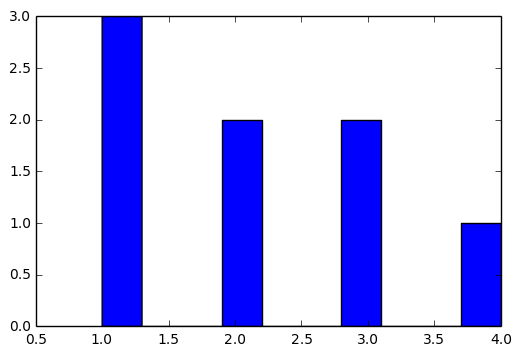

In [107]:
data = [1,2,1,3,3,1,4,2]
%matplotlib inline
import matplotlib.pyplot as plt
plt.hist(data)

### Passing Minutes

(array([ 370.,  155.,   83.,   19.,   10.,    4.,    2.,    3.,    0.,    1.]),
 array([    0.        ,   356.47332645,   712.9466529 ,  1069.41997935,
         1425.8933058 ,  1782.36663225,  2138.8399587 ,  2495.31328515,
         2851.7866116 ,  3208.25993805,  3564.7332645 ]),
 <a list of 10 Patch objects>)

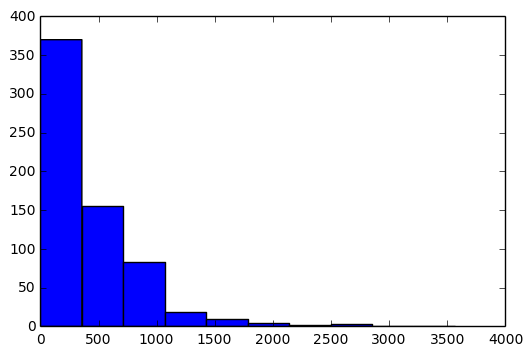

In [110]:
%matplotlib inline
plt.hist(passing_minutes.values())

### Non Passing Minutes

non_passing_minutes


(array([ 272.,   34.,   17.,    9.,    6.,    2.,    1.,    5.,    0.,    2.]),
 array([    0.        ,   176.85227493,   353.70454987,   530.5568248 ,
          707.40909973,   884.26137467,  1061.1136496 ,  1237.96592453,
         1414.81819947,  1591.6704744 ,  1768.52274933]),
 <a list of 10 Patch objects>)

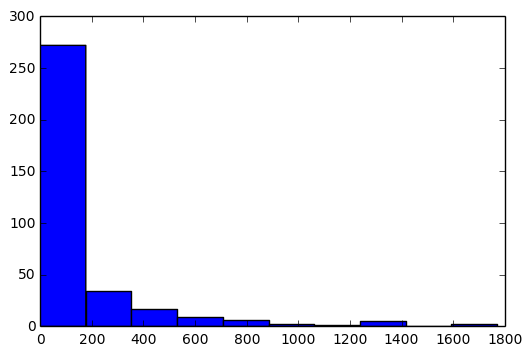

In [109]:
%matplotlib inline
plt.hist(non_passing_minutes.values())

### Passing Lessons

(array([ 516.,   97.,   23.,    4.,    3.,    3.,    0.,    0.,    0.,    1.]),
 array([  0. ,   3.6,   7.2,  10.8,  14.4,  18. ,  21.6,  25.2,  28.8,
         32.4,  36. ]),
 <a list of 10 Patch objects>)

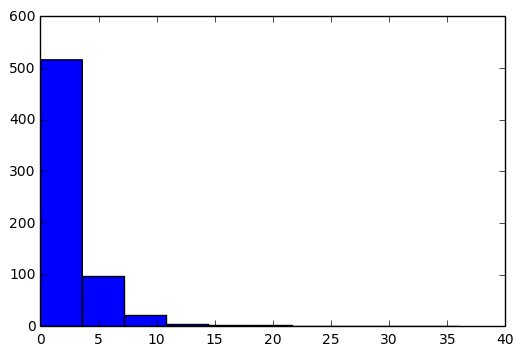

In [111]:
%matplotlib inline
plt.hist(passing_lessons.values())

### Non Passing Lessons

(array([ 317.,   17.,    6.,    4.,    1.,    1.,    0.,    1.,    0.,    1.]),
 array([  0. ,   2.7,   5.4,   8.1,  10.8,  13.5,  16.2,  18.9,  21.6,
         24.3,  27. ]),
 <a list of 10 Patch objects>)

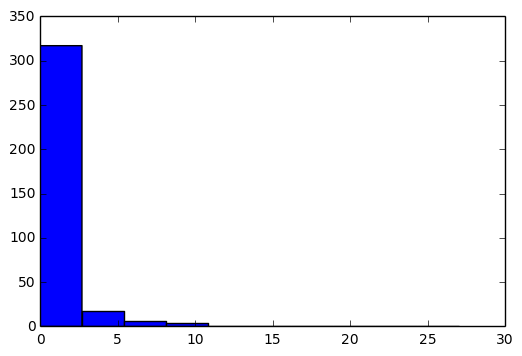

In [112]:
%matplotlib inline
plt.hist(non_passing_lessons.values())

### Passing Days Visited

(array([ 87.,  82.,  79.,   0.,  91.,  77.,   0.,  85.,  78.,  68.]),
 array([ 0. ,  0.7,  1.4,  2.1,  2.8,  3.5,  4.2,  4.9,  5.6,  6.3,  7. ]),
 <a list of 10 Patch objects>)

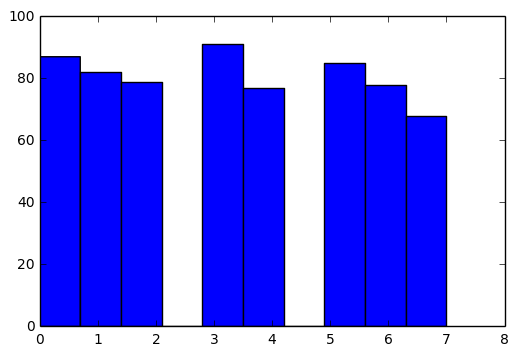

In [113]:
%matplotlib inline
plt.hist(passing_visits.values())

### Non Passing Days Visited

(array([ 97.,  90.,  56.,   0.,  41.,  15.,   0.,  24.,  17.,   8.]),
 array([ 0. ,  0.7,  1.4,  2.1,  2.8,  3.5,  4.2,  4.9,  5.6,  6.3,  7. ]),
 <a list of 10 Patch objects>)

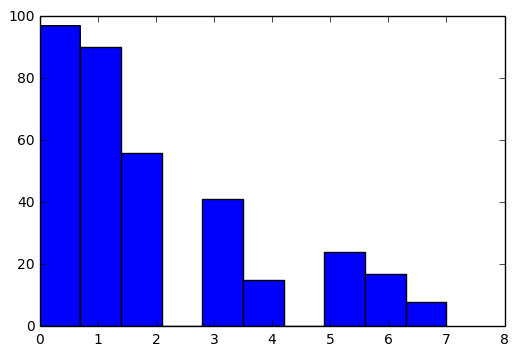

In [114]:
%matplotlib inline
plt.hist(non_passing_visits.values())

## Improving Plots and Sharing Findings

In [115]:
######################################
#                 14                 #
######################################

## Make a more polished version of at least one of your visualizations
## from earlier. Try importing the seaborn library to make the visualization
## look better, adding axis labels and a title, and changing one or more
## arguments to the hist() function.

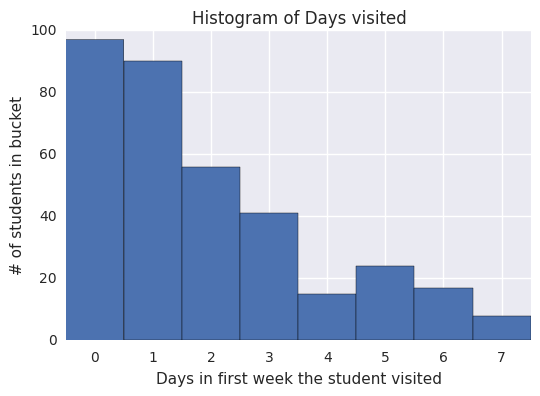

In [157]:
import seaborn as sns
%matplotlib inline
plt.hist(non_passing_visits.values(), bins=np.arange(9)-0.5, align="mid")
plt.xlim(-.5,7.5)
plt.xlabel("Days in first week the student visited")
plt.ylabel("# of students in bucket")
plt.title("Histogram of Days visited")

Haha, seaborn seems to make the plots just look like ggplot. Thats nice though. 

But man, how the heck do you get the bars to line up correctly with the x labels. I have 8 bins which is correct because I have 8 possible values. But I can't get them to algin correctly. They don't show us how in the class. Frustrating. Looked online and have not figured it out yet. Anyways, moving on. 

Ahhh, finaly. You have to use numpy to make an array and for the bins and add 2 bins then subtract 0.5 to make them center. What the hell. That seems like a bit of a hack. This should probably be a standard setting. Seems like a practical thing to do. Especially when making a histogram of, uh, days of the week. : )